# Inference

In [ ]:
!pip install safetensors
!pip install safetensors diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.7 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 47789, done.
remote: Counting objects: 100% (1441/1441), done.
remote: Compressing objects: 100% (603/603), done.
remote: Total 47789 (delta 978), reused 1104 (delta 748), pack-reused 46348
Receiving objects: 100% (47789/47789), 31.77 MiB | 9.46 MiB/s, done.
Resolving deltas: 100% (35265/35265), done.


In [ ]:
import torch
from safetensors.torch import load_file
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
def load_lora_weights(pipeline, checkpoint_path):
    pipeline.to("cuda")
    LORA_PREFIX_UNET = "lora_unet"
    LORA_PREFIX_TEXT_ENCODER = "lora_te"
    alpha = 0.75  # Adjustable
    state_dict = load_file(checkpoint_path, device="cuda")
    visited = []

    return pipeline

In [ ]:
import os
!pip install accelerate
# Set the environment variables to automatically choose options
os.environ['ACCELERATE_CHOICE'] = '0'
os.environ['ACCELERATE_DISTRIBUTED_TYPE'] = '0'  # Choose "No distributed training"
os.environ['ACCELERATE_CPU_ONLY'] = 'NO'  # Choose not to run on CPU only

# Run the accelerate config command with echo and pipe for all choices
!echo -e "$ACCELERATE_CHOICE\n$ACCELERATE_DISTRIBUTED_TYPE\n$ACCELERATE_CPU_ONLY" | accelerate config


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 6.5 MB/s eta 0:00:00
----------------------------------------------------------------------------------------------------In which compute environment are you running?
Please input a choice index (starting from 0), and press enter
 ➔  This machine
    AWS (Amazon SageMaker)
This machine
----------------------------------------------------------------------------------------------------Which type of machine are you using?
Please input a choice index (starting from 0), and press enter
 ➔  No distributed training
    multi-CPU
    multi-XPU
    multi-GPU
    multi-NPU
    TPU
No distributed training
Do you want to run your training on CPU only (even if a GPU / Apple Silicon / Ascend NPU device is available)? [yes/NO]:Do you wish to optimize your script with torch dynamo?[yes/NO]:Traceback (most recent call last):
  File "/usr/local/bin/accelerate", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-pa

In [ ]:
# Initialize pipeline
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float32)
#Load and update with LoRA weights (LoRA model)
pipeline = load_lora_weights(pipeline, "C:/Users/Mohammad Osama/Downloads/AIMAdata/aima-v3/aima-v3_loRA.safetensors")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


# Inference 1

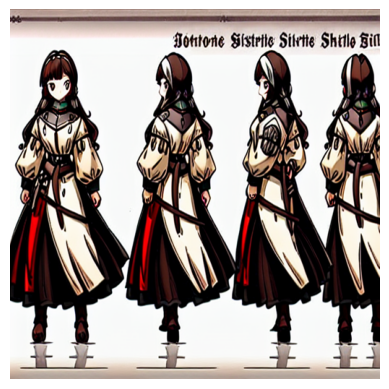

In [15]:
# prompt = "<lora:v3:0.75> , <in_morte>, a character turnaround, GameArt, a girl , Ironlily artist, vanishlily artist , painting, brown hair, armor, shield, sword, neutral background, medieval, 3 poses ,back pose , side pose, front pose"
# # prompt_embeds = compel_proc(prompt)
# neg_prompt = 'ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
# # prompt = None
# image1 = pipeline(prompt,
#              negative_prompt=neg_prompt,
#              num_inference_steps=30,
#             height=512,
#             width=512,
#             guidance_scale=7).images[0]
# image1.save("img1.png")
# image1
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from your PC
image_path = "C:/Users/Adeen Hassan/Downloads/AIMAdata/tests/ex1/grid-0003.png"  # Replace this with the actual path to your image
original_image = Image.open(image_path)

# Resize the image to 512x512
resized_image = original_image.resize((512, 512))

# Display the resized image without axis
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis
plt.show()

# Inference 2

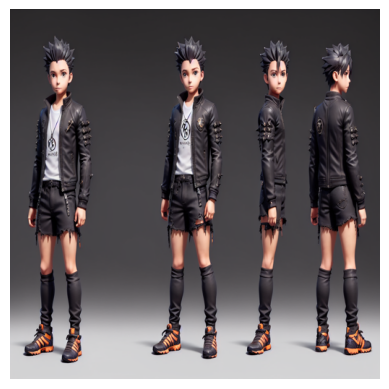

In [14]:
prompt = " <lora:v3:0.75> ,<inMorte>,  a character turnaround,  GameArt , a boy, GameArt , black hair, spikey hair, shorts , white jacket , black sleeves , neutral background, ultra quality, detailed face ,(beautiful detailed face),(beautiful detailed eyes) , black and orange sneakers, back pose , side pose, front pose"
# prompt_embeds = compel_proc(prompt)
neg_prompt = 'ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
# prompt = None
image2 = pipeline(prompt,
             negative_prompt=neg_prompt,
             num_inference_steps=30,
            height=512,
            width=512,
            guidance_scale=7).images[0]
image2.save("img2.png")
image2

# Inference 3

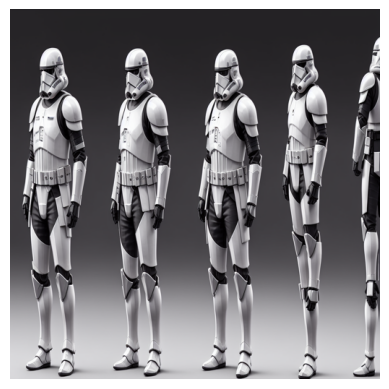

In [12]:
prompt = "<lora:v3:0.75> ,<in_morte>, a character turnaround, GameArt ,a man , soldier in a futuristic armor , white and black armor , helmet, star wars , back pose , side pose, front pose"
# prompt_embeds = compel_proc(prompt)
neg_prompt = 'ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
# prompt = None
image3 = pipeline(prompt,
             negative_prompt=neg_prompt,
             num_inference_steps=30,
            height=512,
            width=512,
            guidance_scale=7).images[0]
image3.save("img3.png")
image3

# 

# Inference 4

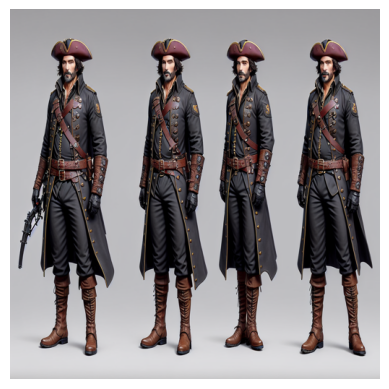

In [11]:
prompt = "<lora:v3:0.75> ,<in_morte>, a character turnaround, GameArt , a man , black cloak , black and red helmet , helmet , gun , gun in hand , black boots , pirate hat , futuristic pirate , black shirt , gloves , armbands , pouch on hip , 3 poses ,back pose , side pose, front pose"
# prompt_embeds = compel_proc(prompt)
neg_prompt = 'ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
# prompt = None
image4 = pipeline(prompt,
             negative_prompt=neg_prompt,
             num_inference_steps=30,
            height=512,
            width=512,
            guidance_scale=7).images[0]
image4.save("img4.png")
image4

# Inference 5

Game Art

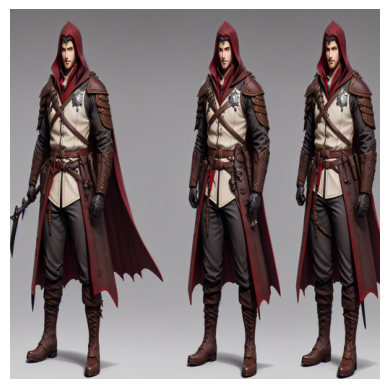

In [9]:
prompt = "<lora:v3:0.75> , <in_morte>, a character turnaround, GameArt , a man , white and slight red overcoat , wearing hood , sword on hip , brown logo belt , bearded , black leather boots , silver gaunlets , 3 poses ,back pose , side pose, front pose"
# prompt_embeds = compel_proc(prompt)
neg_prompt = 'ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
# prompt = None
image5 = pipeline(prompt,
             negative_prompt=neg_prompt,
             num_inference_steps=30,
            height=512,
            width=512,
            guidance_scale=7).images[0]
image5.save("img5.png")
image5

Anime Art

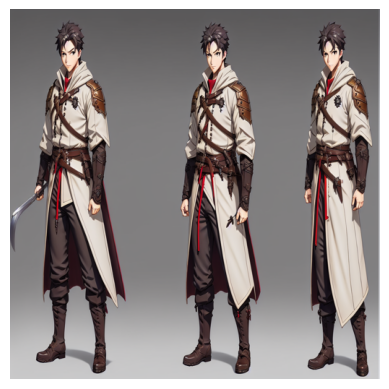

In [7]:
prompt = "<lora:v3:0.75> , <in_morte>, a character turnaround, AnimeArt , a man , white and slight red overcoat , wearing hood , sword on hip , brown logo belt , bearded , black leather boots , silver gaunlets , 3 poses ,back pose , side pose, front pose"
# prompt_embeds = compel_proc(prompt)
neg_prompt = 'ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
# prompt = None
image6 = pipeline(prompt,
             negative_prompt=neg_prompt,
             num_inference_steps=30,
            height=512,
            width=512,
            guidance_scale=7).images[0]
image6.save("img6.png")
image6